In [1]:
import os
from matplotlib import pyplot as plt

from tomato.joint.completeanalyzer import CompleteAnalyzer


In [2]:
data_folder = os.path.join('..', 'sample-data')

# score input
symbtr_name = 'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede'
txt_score_filename = os.path.join(data_folder, symbtr_name, symbtr_name + '.txt')
mu2_score_filename = os.path.join(data_folder, symbtr_name, symbtr_name + '.mu2')

# audio input
audio_mbid = 'f970f1e0-0be9-4914-8302-709a0eac088e'
audio_filename = os.path.join(data_folder, symbtr_name, audio_mbid, audio_mbid + '.mp3')

# instantiate
completeAnalyzer = CompleteAnalyzer()


- Automatic phrase segmentation on the SymbTr-txt file: ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 13.47 seconds to execute.
- Getting relevant metadata of f970f1e0-0be9-4914-8302-709a0eac088e
  The call took 1.31 seconds to execute.
- Extracting predominant melody of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 51.55 seconds to execute.
- Filtering predominant melody of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 7.29 seconds to execute.
- Computing pitch distribution of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.05 seconds to execute.
- Computing pitch 

/home/sertansenturk/Documents/notaIcra/code/tomato/src/tomato/joint/alignedpitchfilter.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p[1] for p in pitch_corrected


  The call took 20.45 seconds to execute.
- Computing the note models for ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3


/home/sertansenturk/Documents/notaIcra/code/tomato/src/tomato/joint/alignednotemodel.py:141: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p for p in pitch
/home/sertansenturk/Documents/notaIcra/code/tomato/src/tomato/joint/alignednotemodel.py:154: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  temp_pitch_vals = np.hstack(nn for nn in note_trajectories)


  The call took 19.25 seconds to execute.
- Computing pitch distribution of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.02 seconds to execute.
- Computing pitch class distribution of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Computing pitch distribution of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.02 seconds to execute.
  The call took 0.03 seconds to execute.
- Identifying the transposition of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.00 seconds to execute.
- Computing the melodic progression model of ../sample-data/ussak--sazsemaisi--

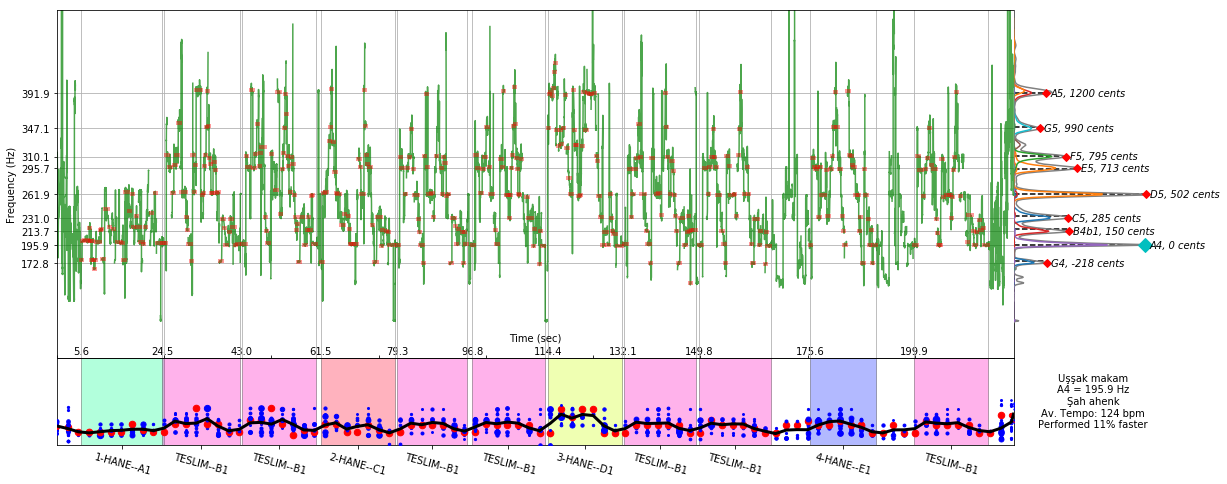

In [3]:
# Apply the complete analysis. The output tuple will have (summarized_features, 
# score_features, audio_features, score_informed_audio_features, joint_features) in order
complete_features = completeAnalyzer.analyze(
    symbtr_txt_filename=txt_score_filename, symbtr_mu2_filename=mu2_score_filename,
    symbtr_name=symbtr_name, audio_filename=audio_filename, audio_metadata=audio_mbid)

# plot the summarized features
plt.rcParams['figure.figsize'] = [20, 8]
fig, ax = completeAnalyzer.plot(complete_features[0])
ax[0].set_ylim([50, 500])
plt.show()


... or you can use the single line call "analyze" of each analyzer object. The procedure below does all the analysis for the given audio and score pair.

In [4]:
from tomato.audio.audioanalyzer import AudioAnalyzer
from tomato.symbolic.symbtranalyzer import SymbTrAnalyzer
from tomato.joint.jointanalyzer import JointAnalyzer

# instantiate analyzer objects
scoreAnalyzer = SymbTrAnalyzer(verbose=True)
audioAnalyzer = AudioAnalyzer(verbose=True)
jointAnalyzer = JointAnalyzer(verbose=True)

# score analysis
score_features = scoreAnalyzer.analyze(
    txt_score_filename, mu2_score_filename, symbtr_name=symbtr_name)

# audio analysis
audio_features = audioAnalyzer.analyze(
    audio_filename, makam=score_features['metadata']['makam']['symbtr_slug'])

# joint analysis
joint_features, score_informed_audio_features = jointAnalyzer.analyze(
    txt_score_filename, score_features, audio_filename, audio_features['pitch'])

# redo some steps in audio analysis
score_informed_audio_features = audioAnalyzer.analyze(
    metadata=False, pitch=False, **score_informed_audio_features)

# summarize all the features extracted from all sources
summarized_features = jointAnalyzer.summarize(
    audio_features, score_features, joint_features, score_informed_audio_features)


- Automatic phrase segmentation on the SymbTr-txt file: ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 9.40 seconds to execute.
- Getting relevant metadata of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 1.31 seconds to execute.
- Extracting predominant melody of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 42.81 seconds to execute.
- Filtering predominant melody of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 6.71 seconds to execute.
- Computing pitch distribution of ../sample-data/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac